# Complete regression Example using Housing Prices

__The Machine learning workflow__:
Remember, as data scientists we want a consistent process to getting great results. That’s where the machine learning workflow comes in.
There are five core steps:
    -__Exploratory Analysis__ – First, “get to know” the data. This step should be quick, efficient, and decisive.
    -__Data Cleaning__ – Then, clean your data to avoid many common pitfalls. Better data beats fancier algorithms.
    -__Feature Engineering__ – Next, help your algorithms “focus” on what’s important by creating new features.
    -__Algorithm Selection__ – Choose the best, most appropriate algorithms without wasting your time.
    -__Model Training__ – Finally, train your models. This step is pretty formulaic once you’ve done the first four.

## Exploratory Analysis

Why perform exploratory analysis upfront?

The purpose of exploratory analysis is to “get to know” the dataset. Doing so upfront will make the rest of the project much smoother, in 3 main ways:

You’ll gain valuable hints for Data Cleaning (which can make or break your models).
You’ll think of ideas for Feature Engineering (which can take your models from good to great).
You’ll get a “feel” for the dataset, which will help you communicate results and deliver greater impact.

However, exploratory analysis for machine learning should be quick, efficient, and decisive… not long and drawn out! Don’t skip this step, but don’t get stuck on it either.

You see, there are infinite possible plots, charts, and tables, but you only need a handful to “get to know” the data well enough to work with it. In this guide, we’ll show you the visualizations that provide the biggest bang for your buck.
Start with Basics

First, you’ll want to answer a set of basic questions about the dataset:

How many observations do I have?
How many features?
What are the data types of my features? Are they numeric? Categorical?
Do I have a target variable?
Correlations?

In [39]:
import numpy as np
#Loading packages
import pandas as pd

In [40]:
#Import data
df = pd.read_csv(r"C:\Users\jg\code\templat_reg_and_class\data\housing_train_reg_uni.csv")
print(df.head())
print("Dim of data:", df.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [41]:
#Cutting down the number of features for this project
col = ["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","FullBath","YearBuilt","YearRemodAdd",
       "LotFrontage","MSSubClass", "MiscFeature", "PoolQC"]
df = df[["Id"]+col+["SalePrice"]]
print(df.head())
print("Dim of data:", df.shape)

   Id  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  FullBath  \
0   1            7       1710           2         548          856         2   
1   2            6       1262           2         460         1262         2   
2   3            7       1786           2         608          920         2   
3   4            7       1717           3         642          756         1   
4   5            8       2198           3         836         1145         2   

   YearBuilt  YearRemodAdd  LotFrontage  MSSubClass MiscFeature PoolQC  \
0       2003          2003         65.0          60         NaN    NaN   
1       1976          1976         80.0          20         NaN    NaN   
2       2001          2002         68.0          60         NaN    NaN   
3       1915          1970         60.0          70         NaN    NaN   
4       2000          2000         84.0          60         NaN    NaN   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  

There are 1460 observations and 13 features. The features are:

- OverallQual: Overall material and finish quality
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- TotalBsmtSF: Total square feet of basement area
- FullBath: Full bathrooms above grade
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- LotFrontage: Linear feet of street connected to property
- MSSubClass: The building class
- MiscFeature: Miscellaneous feature not covered in other categories
- PoolQC: Pool quality
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- Id

Shape: (1460, 14)
-----------------
Id --> Type:num | Nas: 0(0%) | Min-Max: (1)-(1460) | Possible PK
OverallQual --> Type:cat | Nas: 0(0%) | Categories: 10
GrLivArea --> Type:num | Nas: 0(0%) | Min-Max: (334)-(5642)
GarageCars --> Type:cat | Nas: 0(0%) | Categories: 5
GarageArea --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1418)
TotalBsmtSF --> Type:num | Nas: 0(0%) | Min-Max: (0)-(6110)
FullBath --> Type:cat | Nas: 0(0%) | Categories: 4
YearBuilt --> Type:num | Nas: 0(0%) | Min-Max: (1872)-(2010)
YearRemodAdd --> Type:num | Nas: 0(0%) | Min-Max: (1950)-(2010)
LotFrontage --> Type:num | Nas: 259(17%) | Min-Max: (21)-(313)
MSSubClass --> Type:cat | Nas: 0(0%) | Categories: 15
MiscFeature --> Type:cat | Nas: 1406(96%) | Categories: 4
PoolQC --> Type:cat | Nas: 1453(99%) | Categories: 3
SalePrice --> Type:num | Nas: 0(0%) | Min-Max: (34900)-(755000)


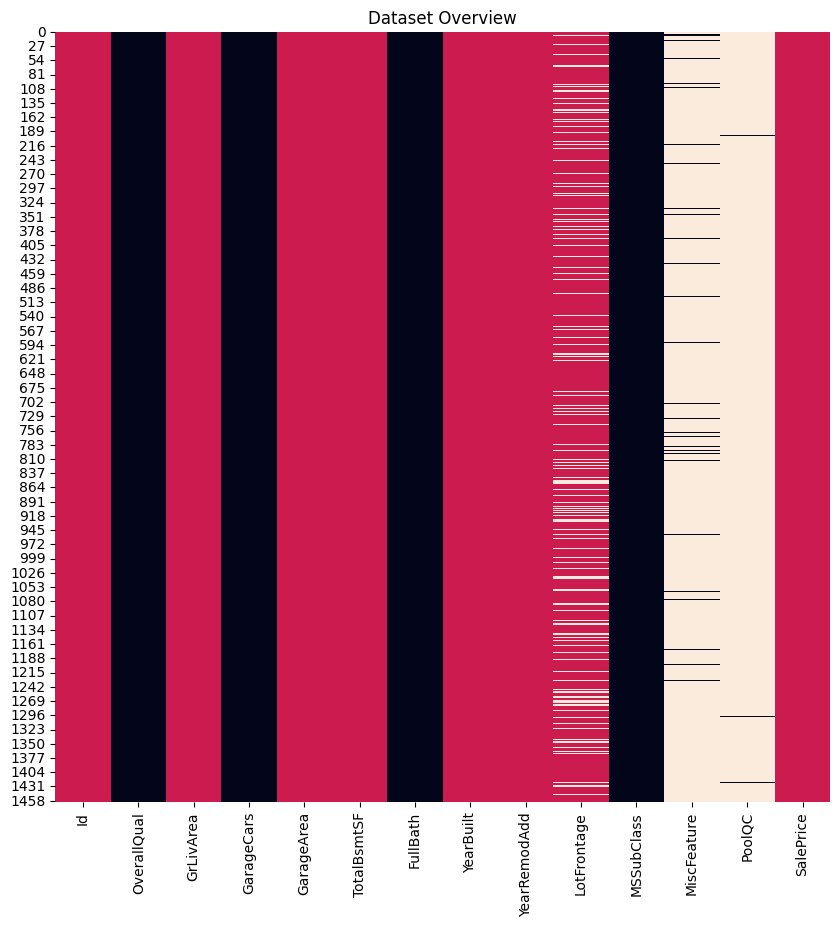

 Categerocial   Numerical/DateTime   NaN 


In [42]:
#Using function to find nans and num and catergorical variables in df
from functions import dtf_overview
dtf_overview(df, figsize=(10,10))

In [43]:
#Set Id as index and SalePrice to Y
df = df.set_index("Id")
df = df.rename(columns={"SalePrice":"Y"})
df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,LotFrontage,MSSubClass,MiscFeature,PoolQC,Y
Id,,,,,,,,,,,,,
1,7,1710,2,548,856,2,2003,2003,65.0,60,NaN,NaN,208500
2,6,1262,2,460,1262,2,1976,1976,80.0,20,NaN,NaN,181500
3,7,1786,2,608,920,2,2001,2002,68.0,60,NaN,NaN,223500
4,7,1717,3,642,756,1,1915,1970,60.0,70,NaN,NaN,140000
5,8,2198,3,836,1145,2,2000,2000,84.0,60,NaN,NaN,250000


array([[<AxesSubplot: title={'center': 'OverallQual'}>,
        <AxesSubplot: title={'center': 'GrLivArea'}>,
        <AxesSubplot: title={'center': 'GarageCars'}>],
       [<AxesSubplot: title={'center': 'GarageArea'}>,
        <AxesSubplot: title={'center': 'TotalBsmtSF'}>,
        <AxesSubplot: title={'center': 'FullBath'}>],
       [<AxesSubplot: title={'center': 'YearBuilt'}>,
        <AxesSubplot: title={'center': 'YearRemodAdd'}>,
        <AxesSubplot: title={'center': 'LotFrontage'}>],
       [<AxesSubplot: title={'center': 'MSSubClass'}>,
        <AxesSubplot: title={'center': 'Y'}>, <AxesSubplot: >]],
      dtype=object)

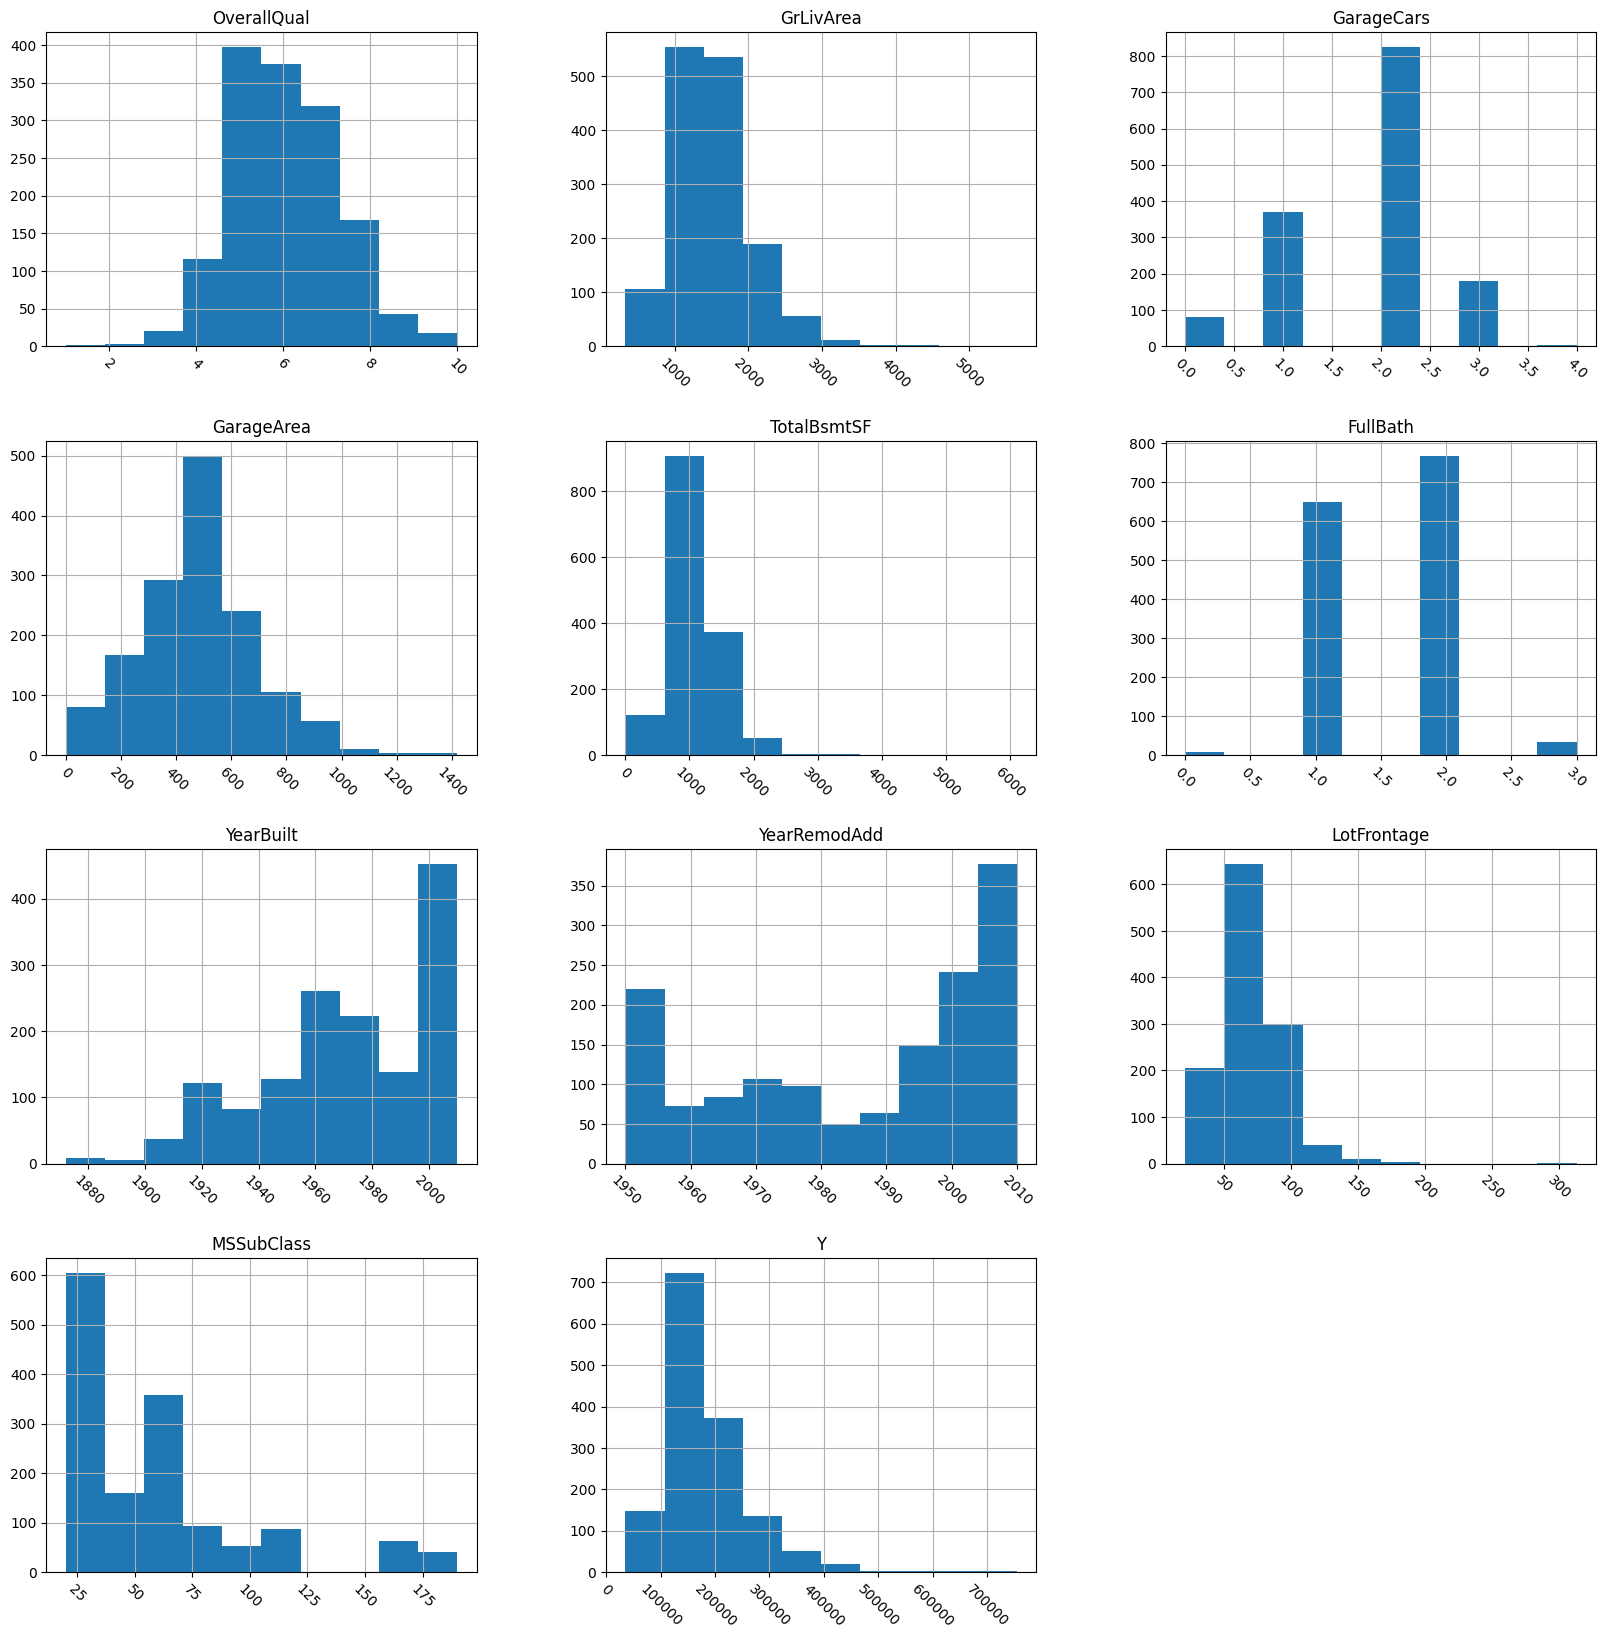

In [44]:
#Make histogram of num variabels
df.hist(figsize=(20,20), xrot=-45)

Here are a few things to look out for in a histogram:
    - Distributions that are unexpected
    - Potential outliers that don’t make sense
    - Features that should be binary (i.e. “wannabe indicator variables”)
    - Boundaries that don’t make sense
    - Potential measurement errors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Q1 quantile of Y :  129975.0
Q2 quantile (median) of Y:  163000.0
Q3 quantile of Y :  214000.0


C:\Users\jg\code\templat_reg_and_class\code\functions.py:116: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade":True}, ax=ax[0])
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\seaborn\distributions.py:2517: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


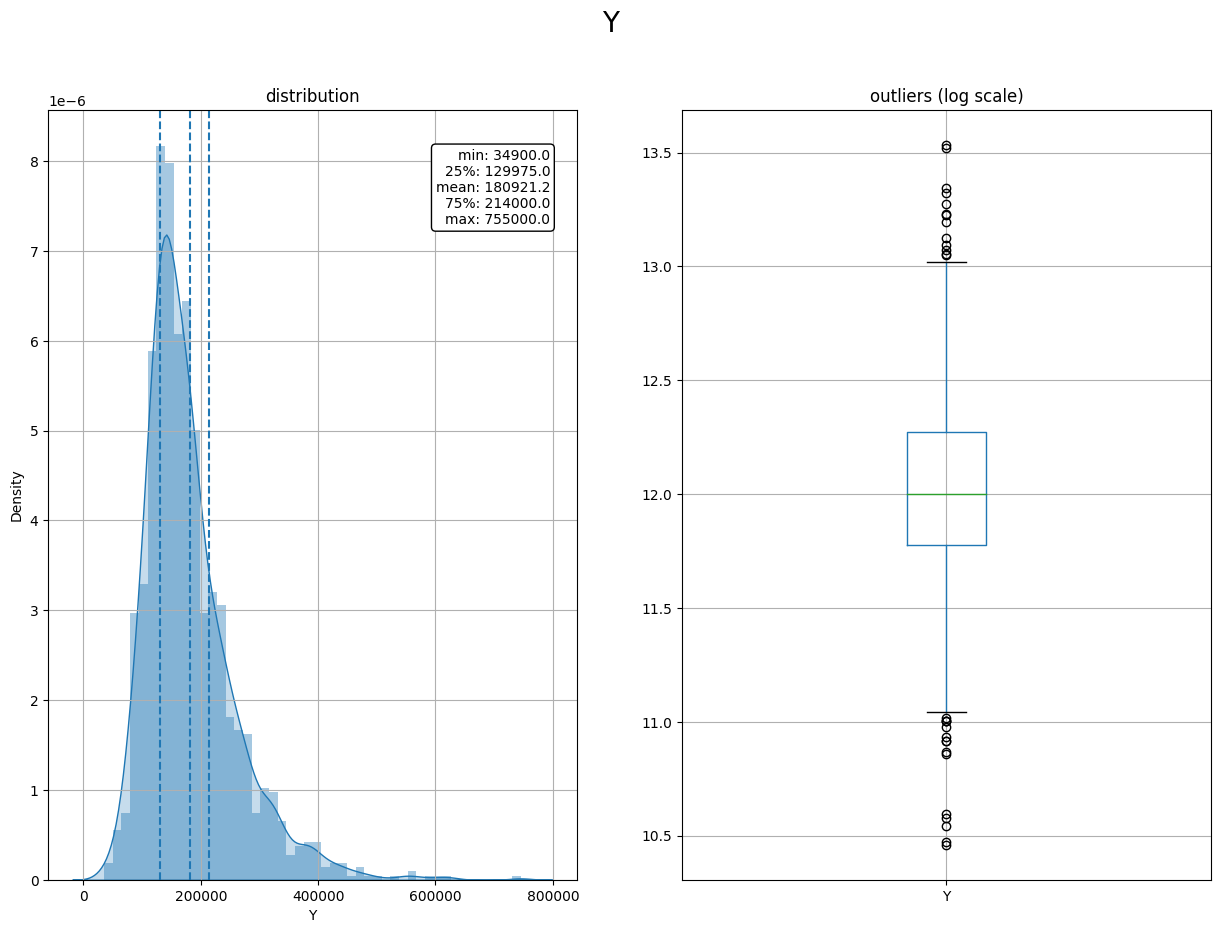

In [45]:
#Get the distribution of SalePrice
%load_ext autoreload
from functions import freqdist_plot
%autoreload 2
freqdist_plot(dtf = df, x = "Y", box_logscale=True, figsize=(15,10), quantile_breaks=(0,10))

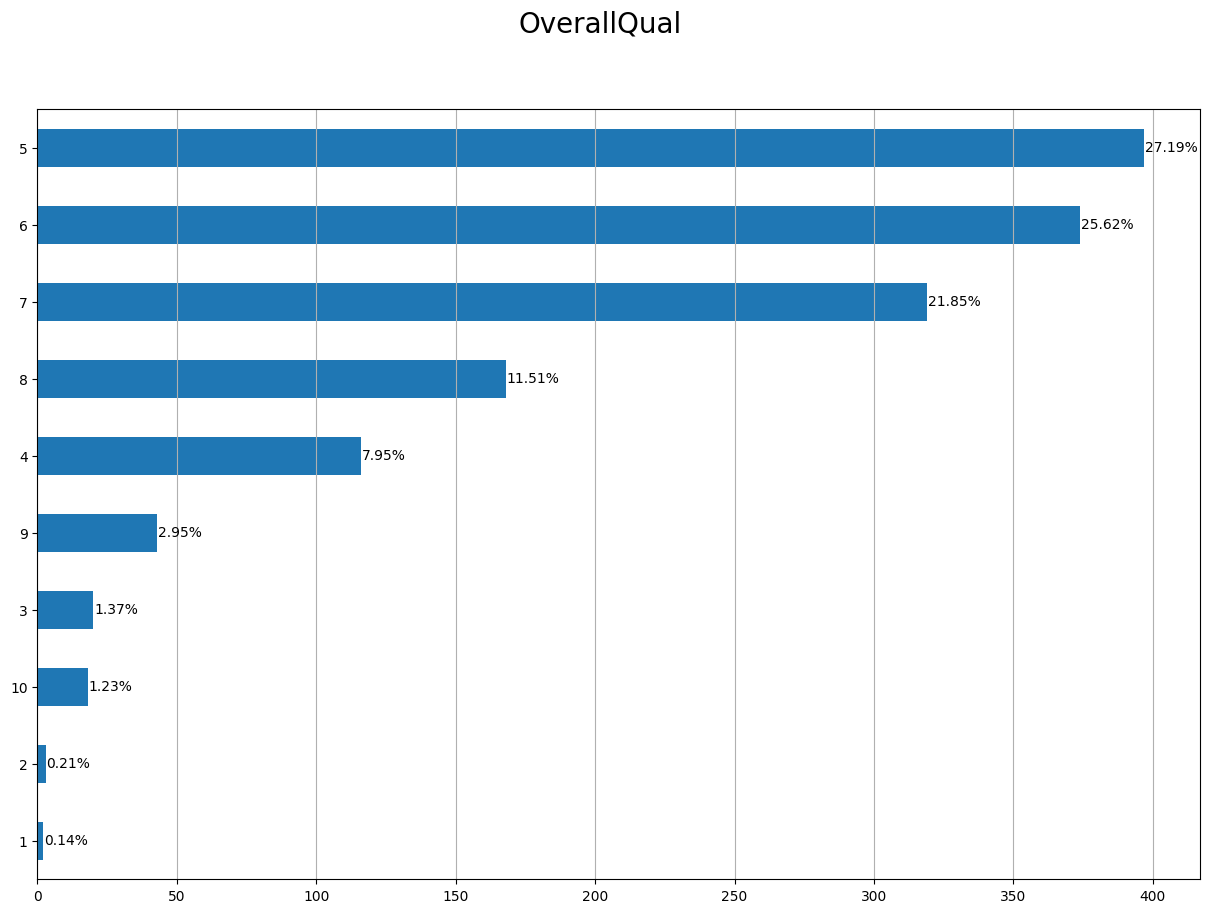

In [46]:
#Plotting categorical variables
freqdist_plot(df, "OverallQual", figsize=(15,10))

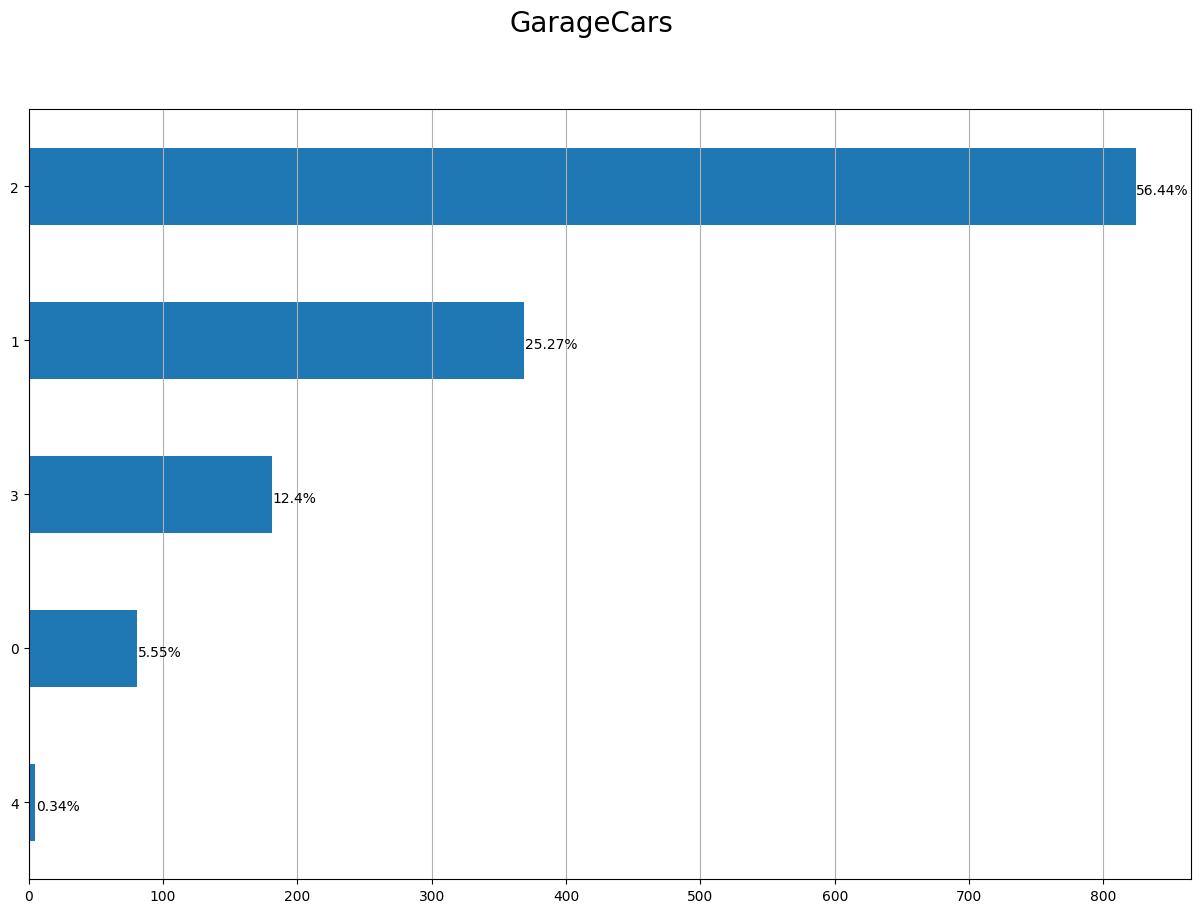

In [47]:
freqdist_plot(df, "GarageCars", figsize=(15,10))

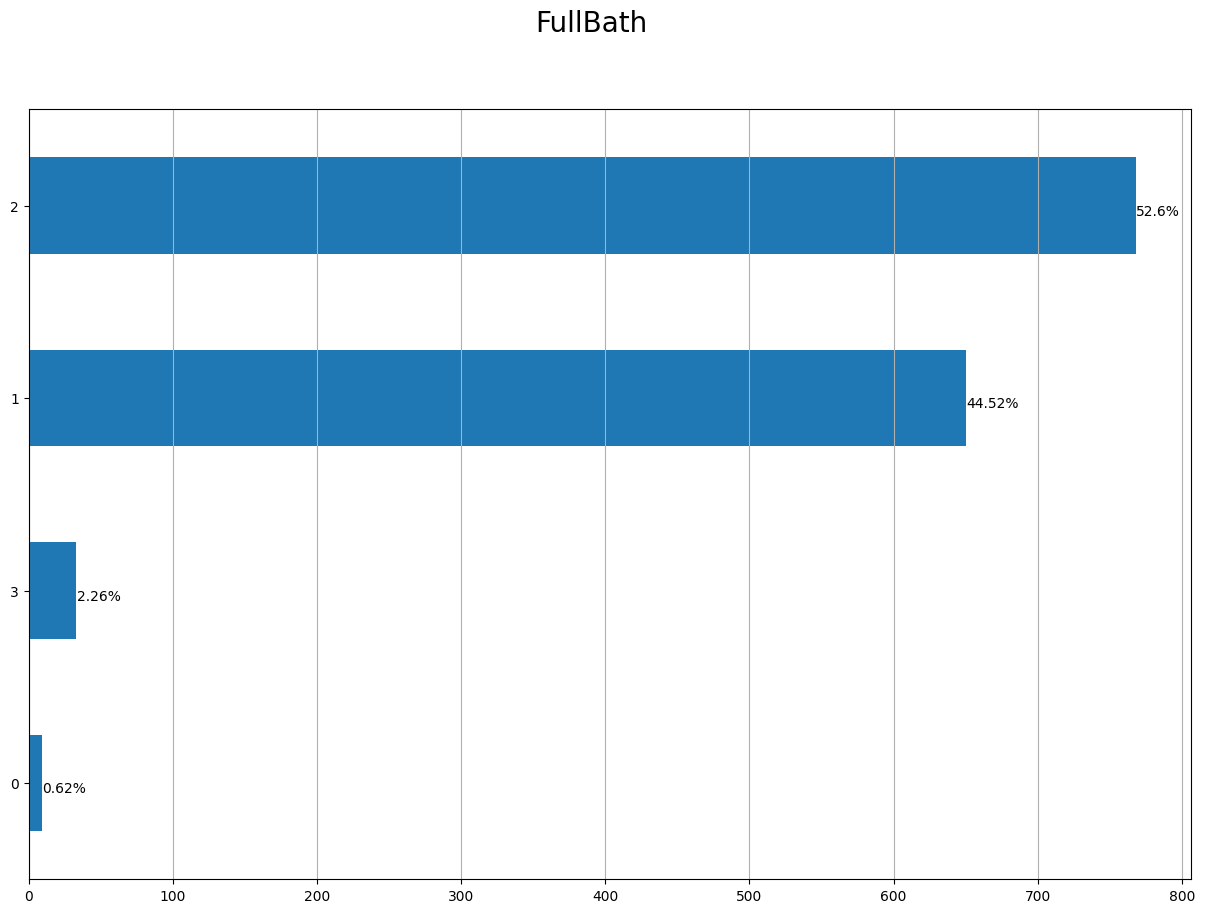

In [48]:
freqdist_plot(df, "FullBath", figsize=(15,10))

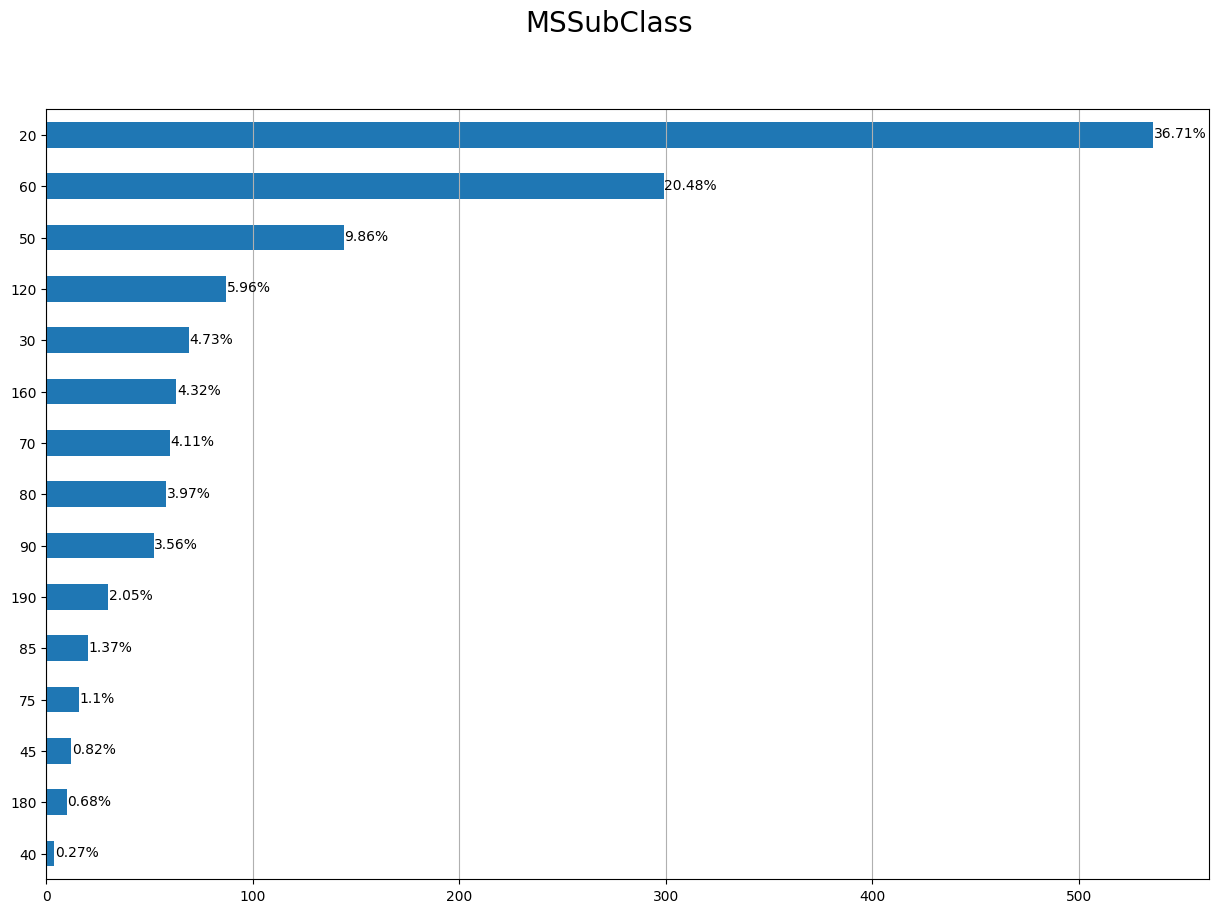

In [49]:
freqdist_plot(df, "MSSubClass", figsize=(15,10))

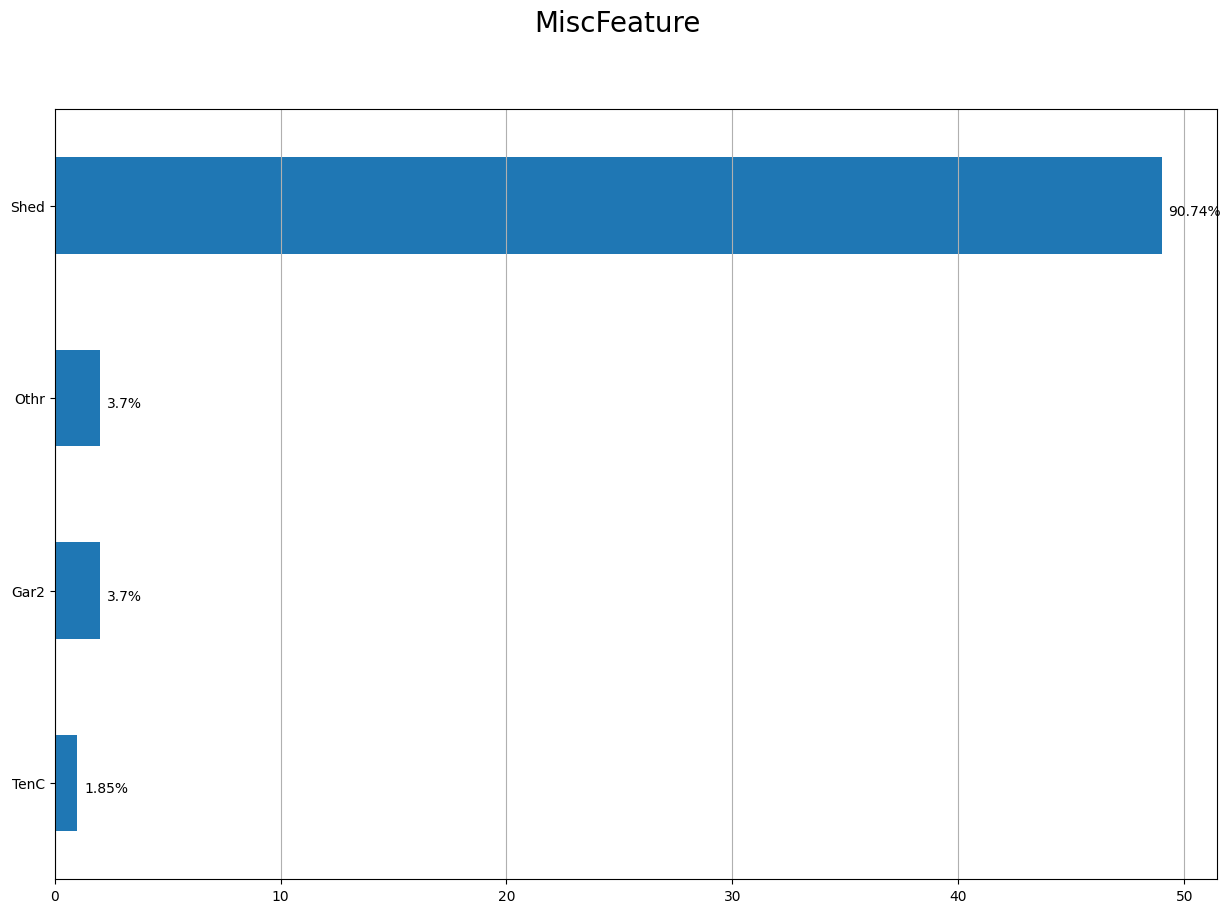

In [50]:
freqdist_plot(df, "MiscFeature", figsize=(15,10))

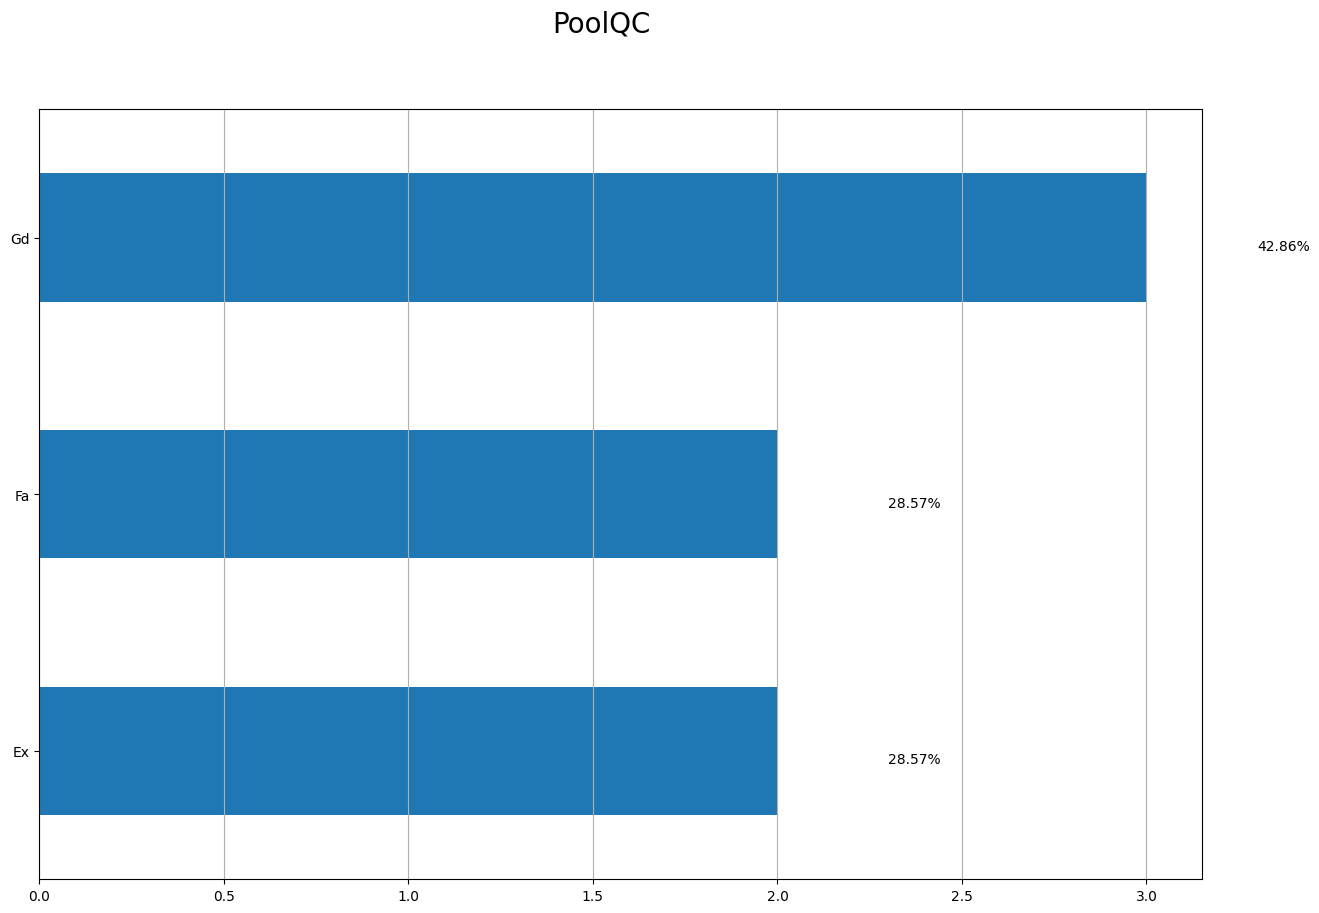

In [51]:
freqdist_plot(df, "PoolQC", figsize=(15,10))

Anyway, back to sparse classes… as you can see, some of the classes for ‘exterior_walls’ have very short bars. Those are sparse classes.

They tend to be problematic when building models.

In the best case, they don’t influence the model much.
In the worse case, they can cause the model to be overfit.

Therefore, we recommend making a note to combine or reassign some of these classes later. We prefer saving this until Feature Engineering.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- WARNING: Factorizing 4 labels of MiscFeature ---
--- WARNING: Factorizing 3 labels of PoolQC ---


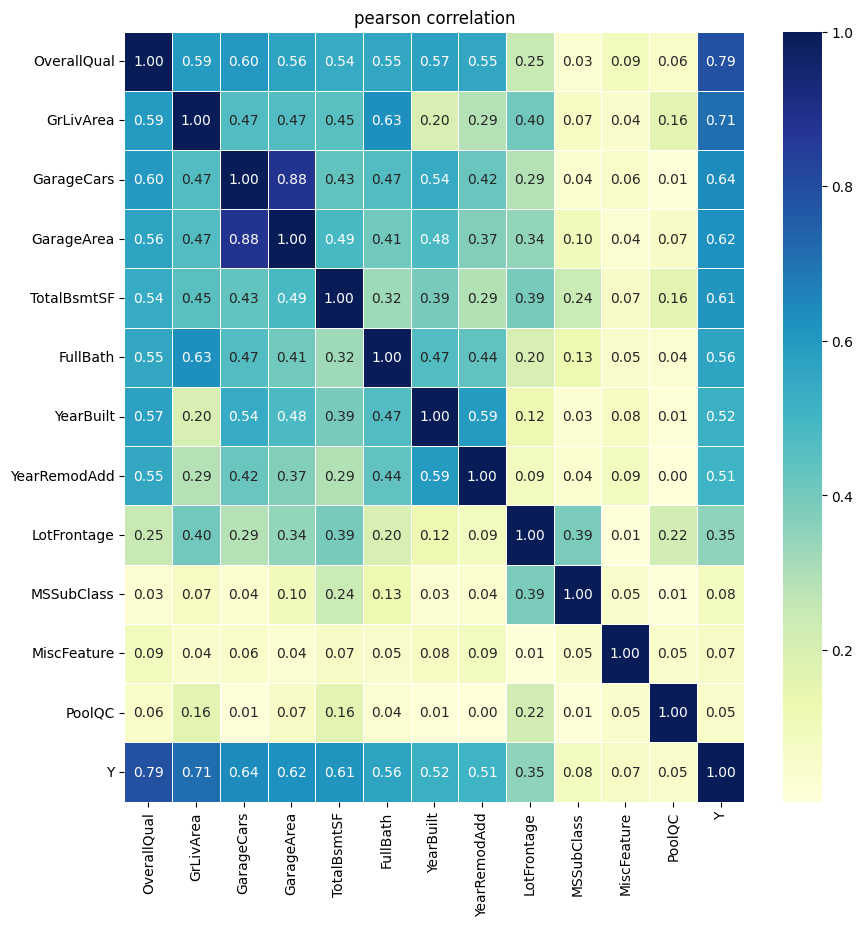

In [52]:
#Finding correlation with num var and Y
%load_ext autoreload
from functions import corr_matrix
%autoreload 2
corr = corr_matrix(df, method="pearson", negative=False, figsize=(10,10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has

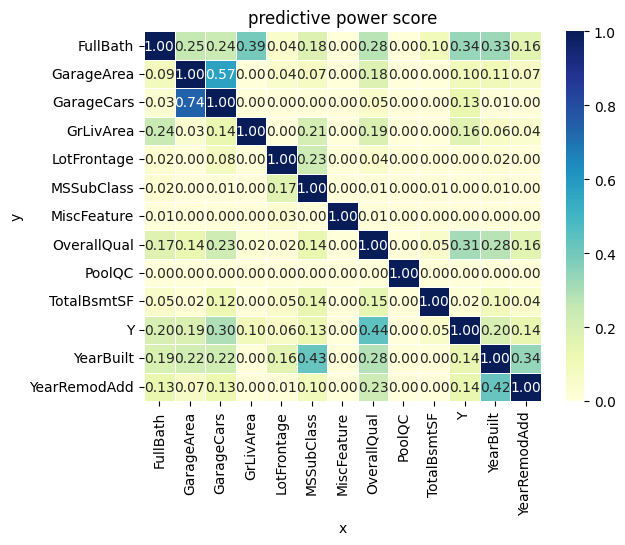

In [53]:
#Finding predictiv score between num and Y
%load_ext autoreload
from functions import pps_matrix
%autoreload 2
pps = pps_matrix(dtf = df, figsize=(15,15))

## Data Cleaning

__Remove Unwanted Observations__:
    - Duplicate observations
    - Irrelevant observation

__Fix Structural Errors__:
    - Typos and inconsistent capitalization

__Filter Unwanted Outliers__:
    - Innocent until proven guilty

__Handle missing data__:
   - Catgorical data gets label "Missing!"
   - Numerical gets flagged with a dummy variabel and then filled with 0.

In [54]:
#Checking for duplicates
sum(df.duplicated() == True)

0

In [55]:
#Change name of Othr to Other in MiscFeature
df = df.replace({"MiscFeature" : "Othr"}, "Other")

In [56]:
#Handling missing data - categorical
print("Missing values in categorical feature:", df.select_dtypes(include=["object"]).isnull().sum())

#Fill in "Missing" for Nan
for feat in df.select_dtypes(include=["object"]):
       df[feat] = df[feat].fillna("Missing")

Missing values in categorical feature: MiscFeature    1406
PoolQC         1453
dtype: int64


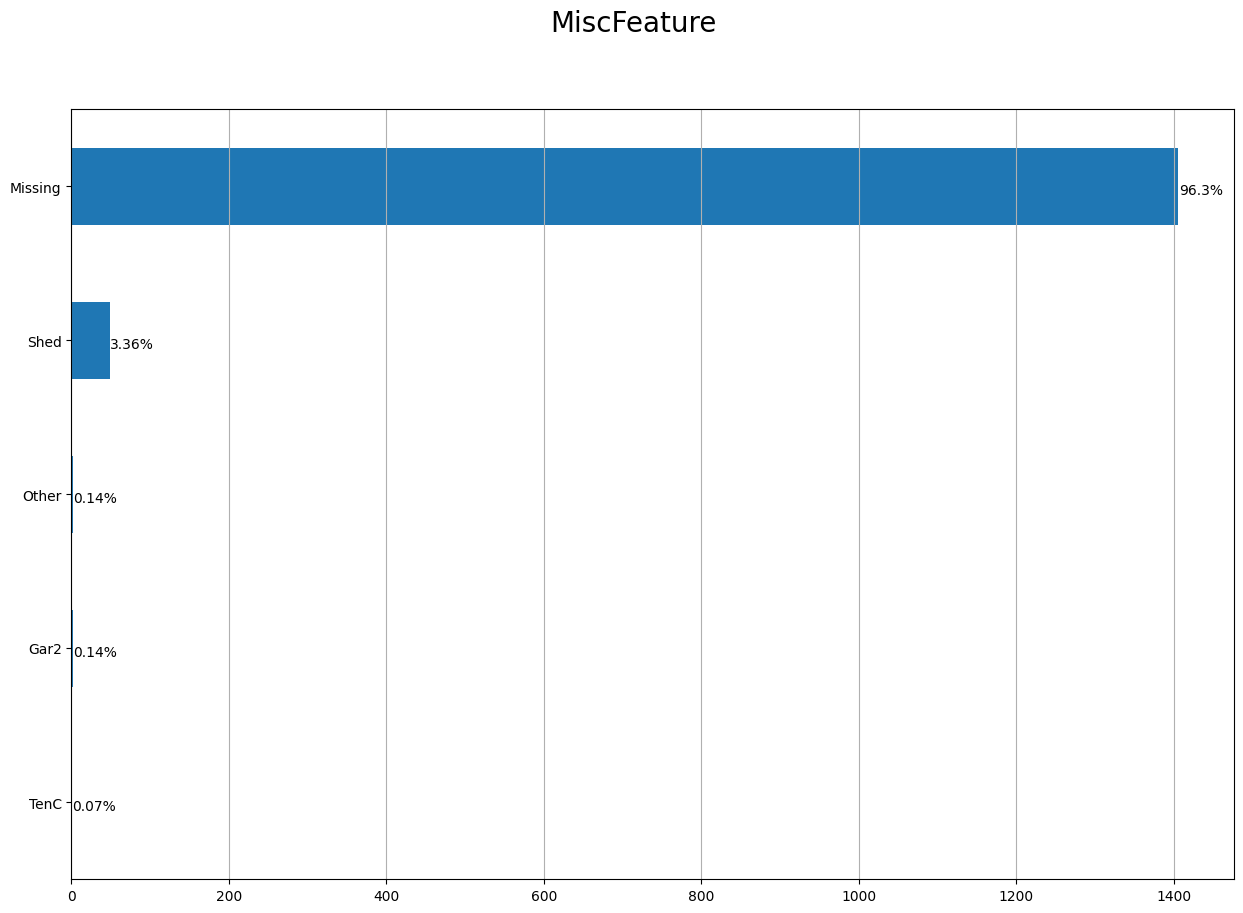

In [57]:
#Bar Plotting MiscFeature
freqdist_plot(df, "MiscFeature", figsize=(15, 10))

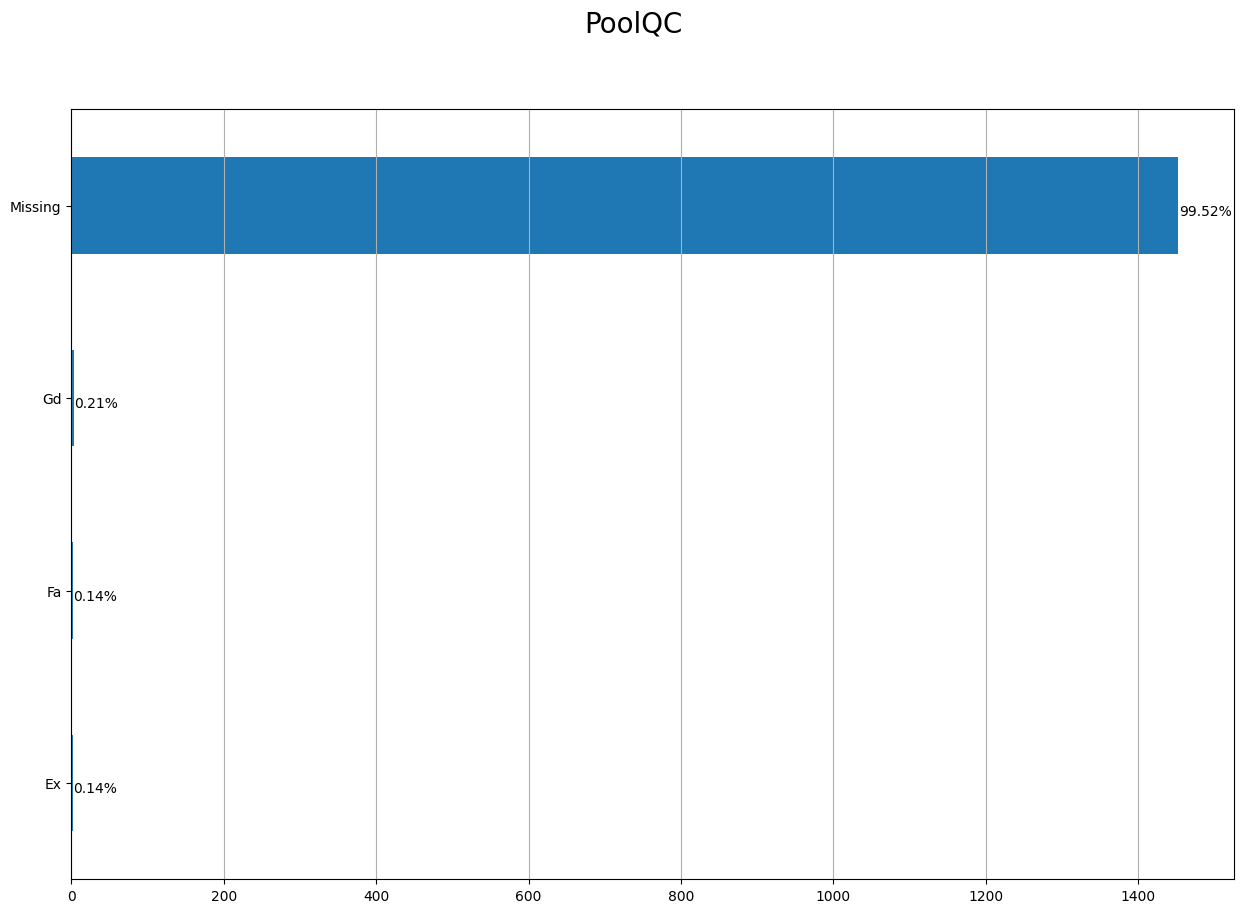

In [58]:
#Barplotting PoolQC
freqdist_plot(df, "PoolQC", figsize=(15, 10))

In [67]:
#Handling missing data - numer
print("Missing values in numerical feature:", df.select_dtypes(include=["float"]).isnull().sum())

#Make new col called "LotFrontageMissing"
df["LotFrontageMissing"] = [1 if b else 0 for b in df["LotFrontage"].isna()]

#Fill in 0 for Nan
for feat in df.select_dtypes(include=["float"]):
       df[feat] = df[feat].fillna(0)

print("New df :", df)

Missing values in numerical feature: LotFrontage    259
dtype: int64
New df :       OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  FullBath  \
Id                                                                            
1               7       1710           2         548          856         2   
2               6       1262           2         460         1262         2   
3               7       1786           2         608          920         2   
4               7       1717           3         642          756         1   
5               8       2198           3         836         1145         2   
...           ...        ...         ...         ...          ...       ...   
1456            6       1647           2         460          953         2   
1457            6       2073           2         500         1542         2   
1458            7       2340           1         252         1152         2   
1459            5       1078           1         240 

## Feature Engineering

__Create Intercation Features__:
       - Combine two or more features

__Combine Sparse Classes__:
       - Sparse classes (in categorical features) are those that have very few total observations.
       - Rule of thumb: Combine untl each has at least 50 observations.

__Add Dummy Variables__:
       - Create dummy/indicator variables for categorical features.

__Remove Unused Features__:
       - Unused in this contex means:
       1) ID columns
       2) Features that wouldent be available at the time of prediction
       3) Other text descriptions

In [86]:
#Create a dummy variable if building has been remodeled
a = df["YearRemodAdd"] - df["YearBuilt"]

#1 if remodeled 0 if not
df["Builiding_remodeled"] = [1 if b != 0 else 0 for b in a]

#Dropping "YearRemodAdd" variable
df = df.drop(columns = ["YearRemodAdd"])

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath,YearBuilt,LotFrontage,MSSubClass,MiscFeature,PoolQC,Y,LotFrontageMissing,Builiding_remodeled
Id,,,,,,,,,,,,,,
1,7,1710,2,548,856,2,2003,65.0,60,Missing,Missing,208500,0,0
2,6,1262,2,460,1262,2,1976,80.0,20,Missing,Missing,181500,0,0
3,7,1786,2,608,920,2,2001,68.0,60,Missing,Missing,223500,0,1
4,7,1717,3,642,756,1,1915,60.0,70,Missing,Missing,140000,0,1
5,8,2198,3,836,1145,2,2000,84.0,60,Missing,Missing,250000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6,1647,2,460,953,2,1999,62.0,60,Missing,Missing,175000,0,1
1457,6,2073,2,500,1542,2,1978,85.0,20,Missing,Missing,210000,0,1
1458,7,2340,1,252,1152,2,1941,66.0,70,Shed,Missing,266500,0,1


In [95]:
#Mergin OverallQual variables 1,2,3 -> 4, 5 -> 6 and 7,8,9 -> 10
df.OverallQual.replace([1,2,3,],4, inplace=True)
df.OverallQual.replace([5],6, inplace=True)
df.OverallQual.replace([7,8,9],10, inplace=True)
df.OverallQual.value_counts()

Id
1       False
2       False
3       False
4       False
5       False
        ...  
1456    False
1457    False
1458    False
1459     True
1460     True
Name: OverallQual, Length: 1460, dtype: bool

In [98]:
#Mergin groups i GarageCars 1->2, 3->4 and 0 stays as it is
df.GarageCars.replace([1],2, inplace=True)
df.GarageCars.replace([3],4, inplace=True)
df.GarageCars.value_counts()

2    1193
4     186
0      81
Name: GarageCars, dtype: int64

In [102]:
#Mergin groups in MiscFeatures to missing or extra_feature_in_property
df.MiscFeature.replace(["Gar2", "Other", "TenC","Shed"],"extra_feature_in_property", inplace=True)
df.MiscFeature.value_counts()

Missing                      1406
extra_feature_in_property      54
Name: MiscFeature, dtype: int64

In [104]:
#Mergin groups in PoolQC into exist and misssing
df.PoolQC.replace(["Gd", "Ex", "Fa"],"PoolQC_exist", inplace=True)
df.PoolQC.value_counts()

Missing         1453
PoolQC_exist       7
Name: PoolQC, dtype: int64

In [105]:
#Create dummy variables
df = pd.get_dummies(df, columns = ["OverallQual","GarageCars","MiscFeature","PoolQC" ])
df

,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,LotFrontage,MSSubClass,Y,LotFrontageMissing,Builiding_remodeled,OverallQual_4,OverallQual_6,OverallQual_10,GarageCars_0,GarageCars_2,GarageCars_4,MiscFeature_Missing,MiscFeature_extra_feature_in_property,PoolQC_Missing,PoolQC_PoolQC_exist
Id,,,,,,,,,,,,,,,,,,,,
1,1710,548,856,2,2003,65.0,60,208500,0,0,0,0,1,0,1,0,1,0,1,0
2,1262,460,1262,2,1976,80.0,20,181500,0,0,0,1,0,0,1,0,1,0,1,0
3,1786,608,920,2,2001,68.0,60,223500,0,1,0,0,1,0,1,0,1,0,1,0
4,1717,642,756,1,1915,60.0,70,140000,0,1,0,0,1,0,0,1,1,0,1,0
5,2198,836,1145,2,2000,84.0,60,250000,0,0,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1647,460,953,2,1999,62.0,60,175000,0,1,0,1,0,0,1,0,1,0,1,0
1457,2073,500,1542,2,1978,85.0,20,210000,0,1,0,1,0,0,1,0,1,0,1,0
1458,2340,252,1152,2,1941,66.0,70,266500,0,1,0,0,1,0,1,0,0,1,1,0


In [106]:
#Change name of columns
df = df.rename(columns={'OverallQual_4': 'OverallQual_below_avg', "OverallQual_6" : 'OverallQual_around_avg', "OverallQual_10": 'OverallQual_abow_avg'})
df

,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,LotFrontage,MSSubClass,Y,LotFrontageMissing,Builiding_remodeled,OverallQual_below_avg,OverallQual_around_avg,OverallQual_abow_avg,GarageCars_0,GarageCars_2,GarageCars_4,MiscFeature_Missing,MiscFeature_extra_feature_in_property,PoolQC_Missing,PoolQC_PoolQC_exist
Id,,,,,,,,,,,,,,,,,,,,
1,1710,548,856,2,2003,65.0,60,208500,0,0,0,0,1,0,1,0,1,0,1,0
2,1262,460,1262,2,1976,80.0,20,181500,0,0,0,1,0,0,1,0,1,0,1,0
3,1786,608,920,2,2001,68.0,60,223500,0,1,0,0,1,0,1,0,1,0,1,0
4,1717,642,756,1,1915,60.0,70,140000,0,1,0,0,1,0,0,1,1,0,1,0
5,2198,836,1145,2,2000,84.0,60,250000,0,0,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1647,460,953,2,1999,62.0,60,175000,0,1,0,1,0,0,1,0,1,0,1,0
1457,2073,500,1542,2,1978,85.0,20,210000,0,1,0,1,0,0,1,0,1,0,1,0
1458,2340,252,1152,2,1941,66.0,70,266500,0,1,0,0,1,0,1,0,0,1,1,0


In [107]:
#Change name of columns
df = df.rename(columns={'GarageCars_0': 'does_not_have_garage', "GarageCars_2" : 'one_or_two_cars', "GarageCars_4": 'more_than_two_cars'})
df

,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,LotFrontage,MSSubClass,Y,LotFrontageMissing,Builiding_remodeled,OverallQual_below_avg,OverallQual_around_avg,OverallQual_abow_avg,does_not_have_garage,one_or_two_cars,more_than_two_cars,MiscFeature_Missing,MiscFeature_extra_feature_in_property,PoolQC_Missing,PoolQC_PoolQC_exist
Id,,,,,,,,,,,,,,,,,,,,
1,1710,548,856,2,2003,65.0,60,208500,0,0,0,0,1,0,1,0,1,0,1,0
2,1262,460,1262,2,1976,80.0,20,181500,0,0,0,1,0,0,1,0,1,0,1,0
3,1786,608,920,2,2001,68.0,60,223500,0,1,0,0,1,0,1,0,1,0,1,0
4,1717,642,756,1,1915,60.0,70,140000,0,1,0,0,1,0,0,1,1,0,1,0
5,2198,836,1145,2,2000,84.0,60,250000,0,0,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1647,460,953,2,1999,62.0,60,175000,0,1,0,1,0,0,1,0,1,0,1,0
1457,2073,500,1542,2,1978,85.0,20,210000,0,1,0,1,0,0,1,0,1,0,1,0
1458,2340,252,1152,2,1941,66.0,70,266500,0,1,0,0,1,0,1,0,0,1,1,0


## Algorithm Selection

The most effective algorithms typically offer a combination of regularization, automatic feature selection,
ability to express nonlinear relationships, and/or ensembling. Those algorithms include:
       - Linear reg (baseline model)
       - Lasso regression
       - Ridge regression
       - Elastic Net
       - Random Forest
       - Boosted tree


## Model Training
__Split into Train/test__:
        - Split data into train and test data

__Fit and Tune models__:
       - Use cross validation to find the best set of hyperparameters for each model.

__Evalute each model__:
       - Which model had the best performance on the test set? (performance)
       - Does it perform well across various performance metrics? (robustness)
       - Did it also have (one of) the best cross-validated scores from the training set? (consistency)
       - Does it solve the original business problem? (win condition)

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

#Split into X and y
y = df.Y
X = df.drop("Y", axis= 1)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#Define pipline for training
pipelines = {
       'lasso' : make_pipeline(StandardScaler(),
                               Lasso(random_state=123)),
       'ridge' : make_pipeline(StandardScaler(),
                               Ridge(random_state=123)),
       'enet' :  make_pipeline(StandardScaler(),
                               ElasticNet(random_state=123)),
       'rf' :    make_pipeline(
              RandomForestRegressor(random_state=123)),
       'gb' :    make_pipeline(
              GradientBoostingRegressor(random_state=123))}


#Define hyperparameters that needs to be tuned in models
#Lasso
lasso_hyperparameters = {
"lasso__alpha" : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

#Ridge
ridge_hyperparameters = {
"ridge__alpha" : [0.001, 0.005, 0.01, 0.1, 0.5, 1, 5, 10]}

#Enet
enet_hyperparameters = {
"elasticnet__alpha": [0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10],
"elasticnet__l1_ratio" : [0.1, 0.3, 0.5, 0.7, 0.9]}

#RandomForest
rf_hyperparameters = {
"randomforestregressor__n_estimators" : [100, 200],
"randomforestregressor__max_features" : ["auto", "sqrt", 0.33],
"randomforestregressor__min_samples_leaf" : [1, 3, 5, 10]}

#Gradient boosting
gb_hyperparameters = {
"gradientboostingregressor__n_estimators" : [100, 200],
"gradientboostingregressor__learning_rate" : [0.05, 0.1, 0.2],
"gradientboostingregressor__max_depth" : [1, 3, 5]}

#Put every estimator in a dic
hyperparameters = {
       "lasso" : lasso_hyperparameters,
       "ridge" : ridge_hyperparameters,
       "enet" : enet_hyperparameters,
       "rf" : rf_hyperparameters,
       "gb" : gb_hyperparameters}

fitted_models = {}
for name, pipeline in pipelines.items():
       model = GridSearchCV(pipeline,hyperparameters[name],cv=10,n_jobs=-1)
       model.fit(X_train, y_train)
       print()
       fitted_models[name] = model

In [201]:
#Evaluating training score
for name, model in fitted_models.items():
       print(name)
       print(" — — — — ")
       print("Best score : ", model.best_score_ )
       print("Best hyper params :", model.best_params_)
       print()

lasso
 — — — — 
Best score :  0.7443025383470974
Best hyper params : {'lasso__alpha': 10}

ridge
 — — — — 
Best score :  0.7450213798971397
Best hyper params : {'ridge__alpha': 10}

enet
 — — — — 
Best score :  0.7477402480241991
Best hyper params : {'elasticnet__alpha': 1, 'elasticnet__l1_ratio': 0.9}

rf
 — — — — 
Best score :  0.8213728037263881
Best hyper params : {'randomforestregressor__max_features': 0.33, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__n_estimators': 200}

gb
 — — — — 
Best score :  0.8065315796155044
Best hyper params : {'gradientboostingregressor__learning_rate': 0.05, 'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__n_estimators': 100}



In [203]:
#Evaluating test scores using R2 and MAE
for name, model in fitted_models.items():
       pred = model.predict(X_test)
       print(name)
       print(" — — — — ")
       print("R²:", r2_score(y_test, pred))
       print("MAE:", mean_absolute_error(y_test, pred))
       print("MSE:", mean_squared_error(y_test, pred))
       print()

lasso
 — — — — 
R²: 0.7550949072502844
MAE: 24893.405622598664
MSE: 1345165450.70065

ridge
 — — — — 
R²: 0.7556727035417312
MAE: 24809.356040384628
MSE: 1341991847.4077547

enet
 — — — — 
R²: 0.7578324462761961
MAE: 24270.487834833137
MSE: 1330129246.772606

rf
 — — — — 
R²: 0.81133570472863
MAE: 20826.21042657305
MSE: 1036257306.5770904

gb
 — — — — 
R²: 0.8119713200840307
MAE: 21138.579509907468
MSE: 1032766126.3553153



R2 (explained variance): 0.81133570472863
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.11701141321746752
Mean Absolute Error (Σ|y-pred|/n): 20826.21042657305
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 32190.95069389984
Mean Squared Error Σ(y-pred)^2/n): 1036257306.5770904
Max Error: 187,130


C:\Users\jg\code\templat_reg_and_class\code\functions.py:264: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax[2], label="mean = "+"{:,.0f}".format(np.mean(residuals)))
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\seaborn\distributions.py:2517: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


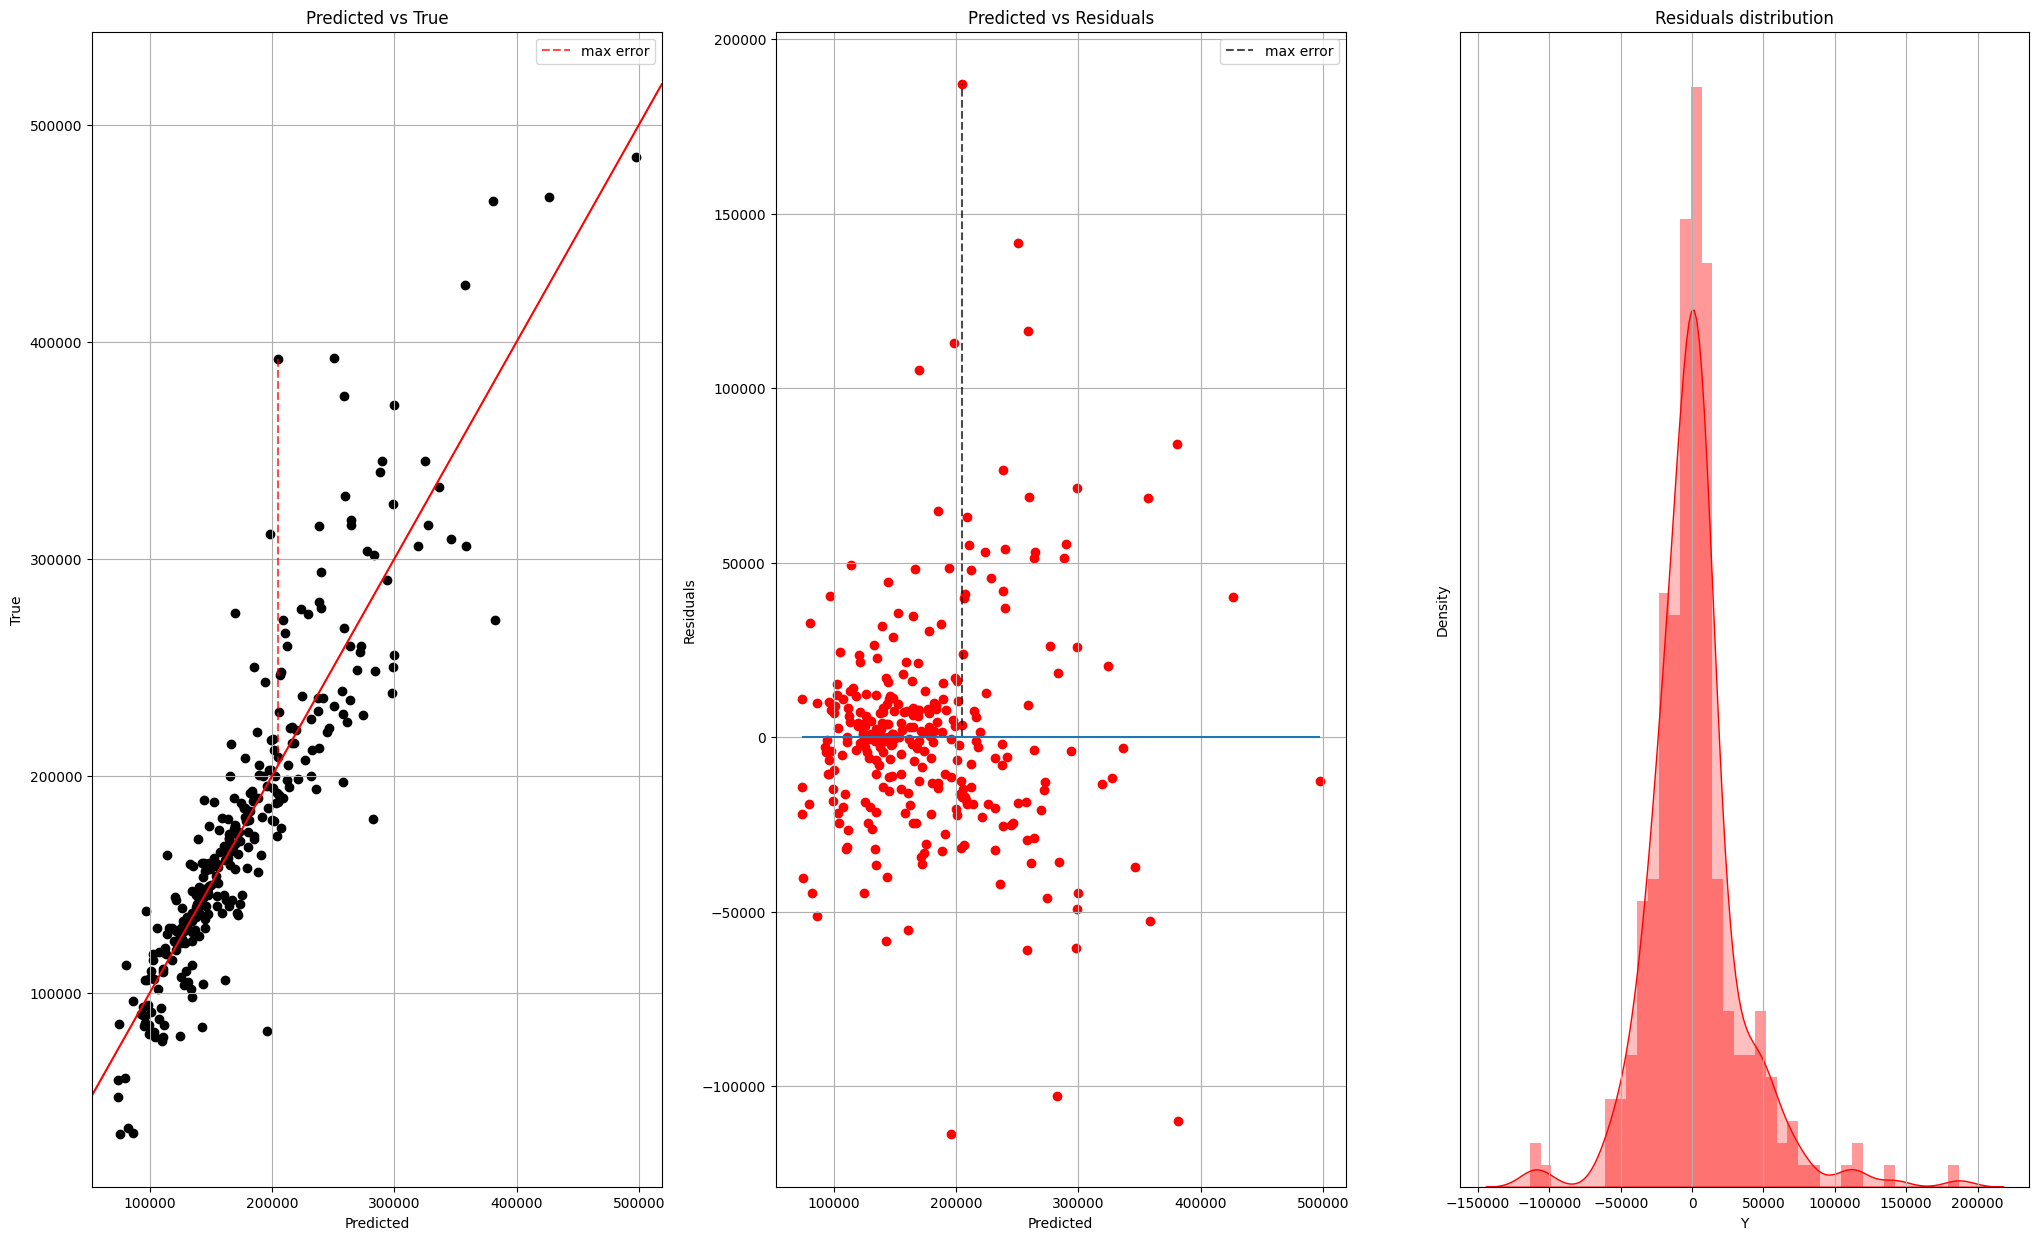

In [204]:
#Evalute preds from best model
from functions import evaluate_regr_model
import numpy as np

#Convert to array pred to array
best_model_pred = fitted_models["rf"].predict(X_test)

#Reset index on y test
y_test_arr = y_test.reset_index(drop=True)

evaluate_regr_model(y_test_arr,best_model_pred, figsize=(25,15) )

--- model used ---
RandomForestRegressor(max_features=0.33, min_samples_leaf=3, n_estimators=200)


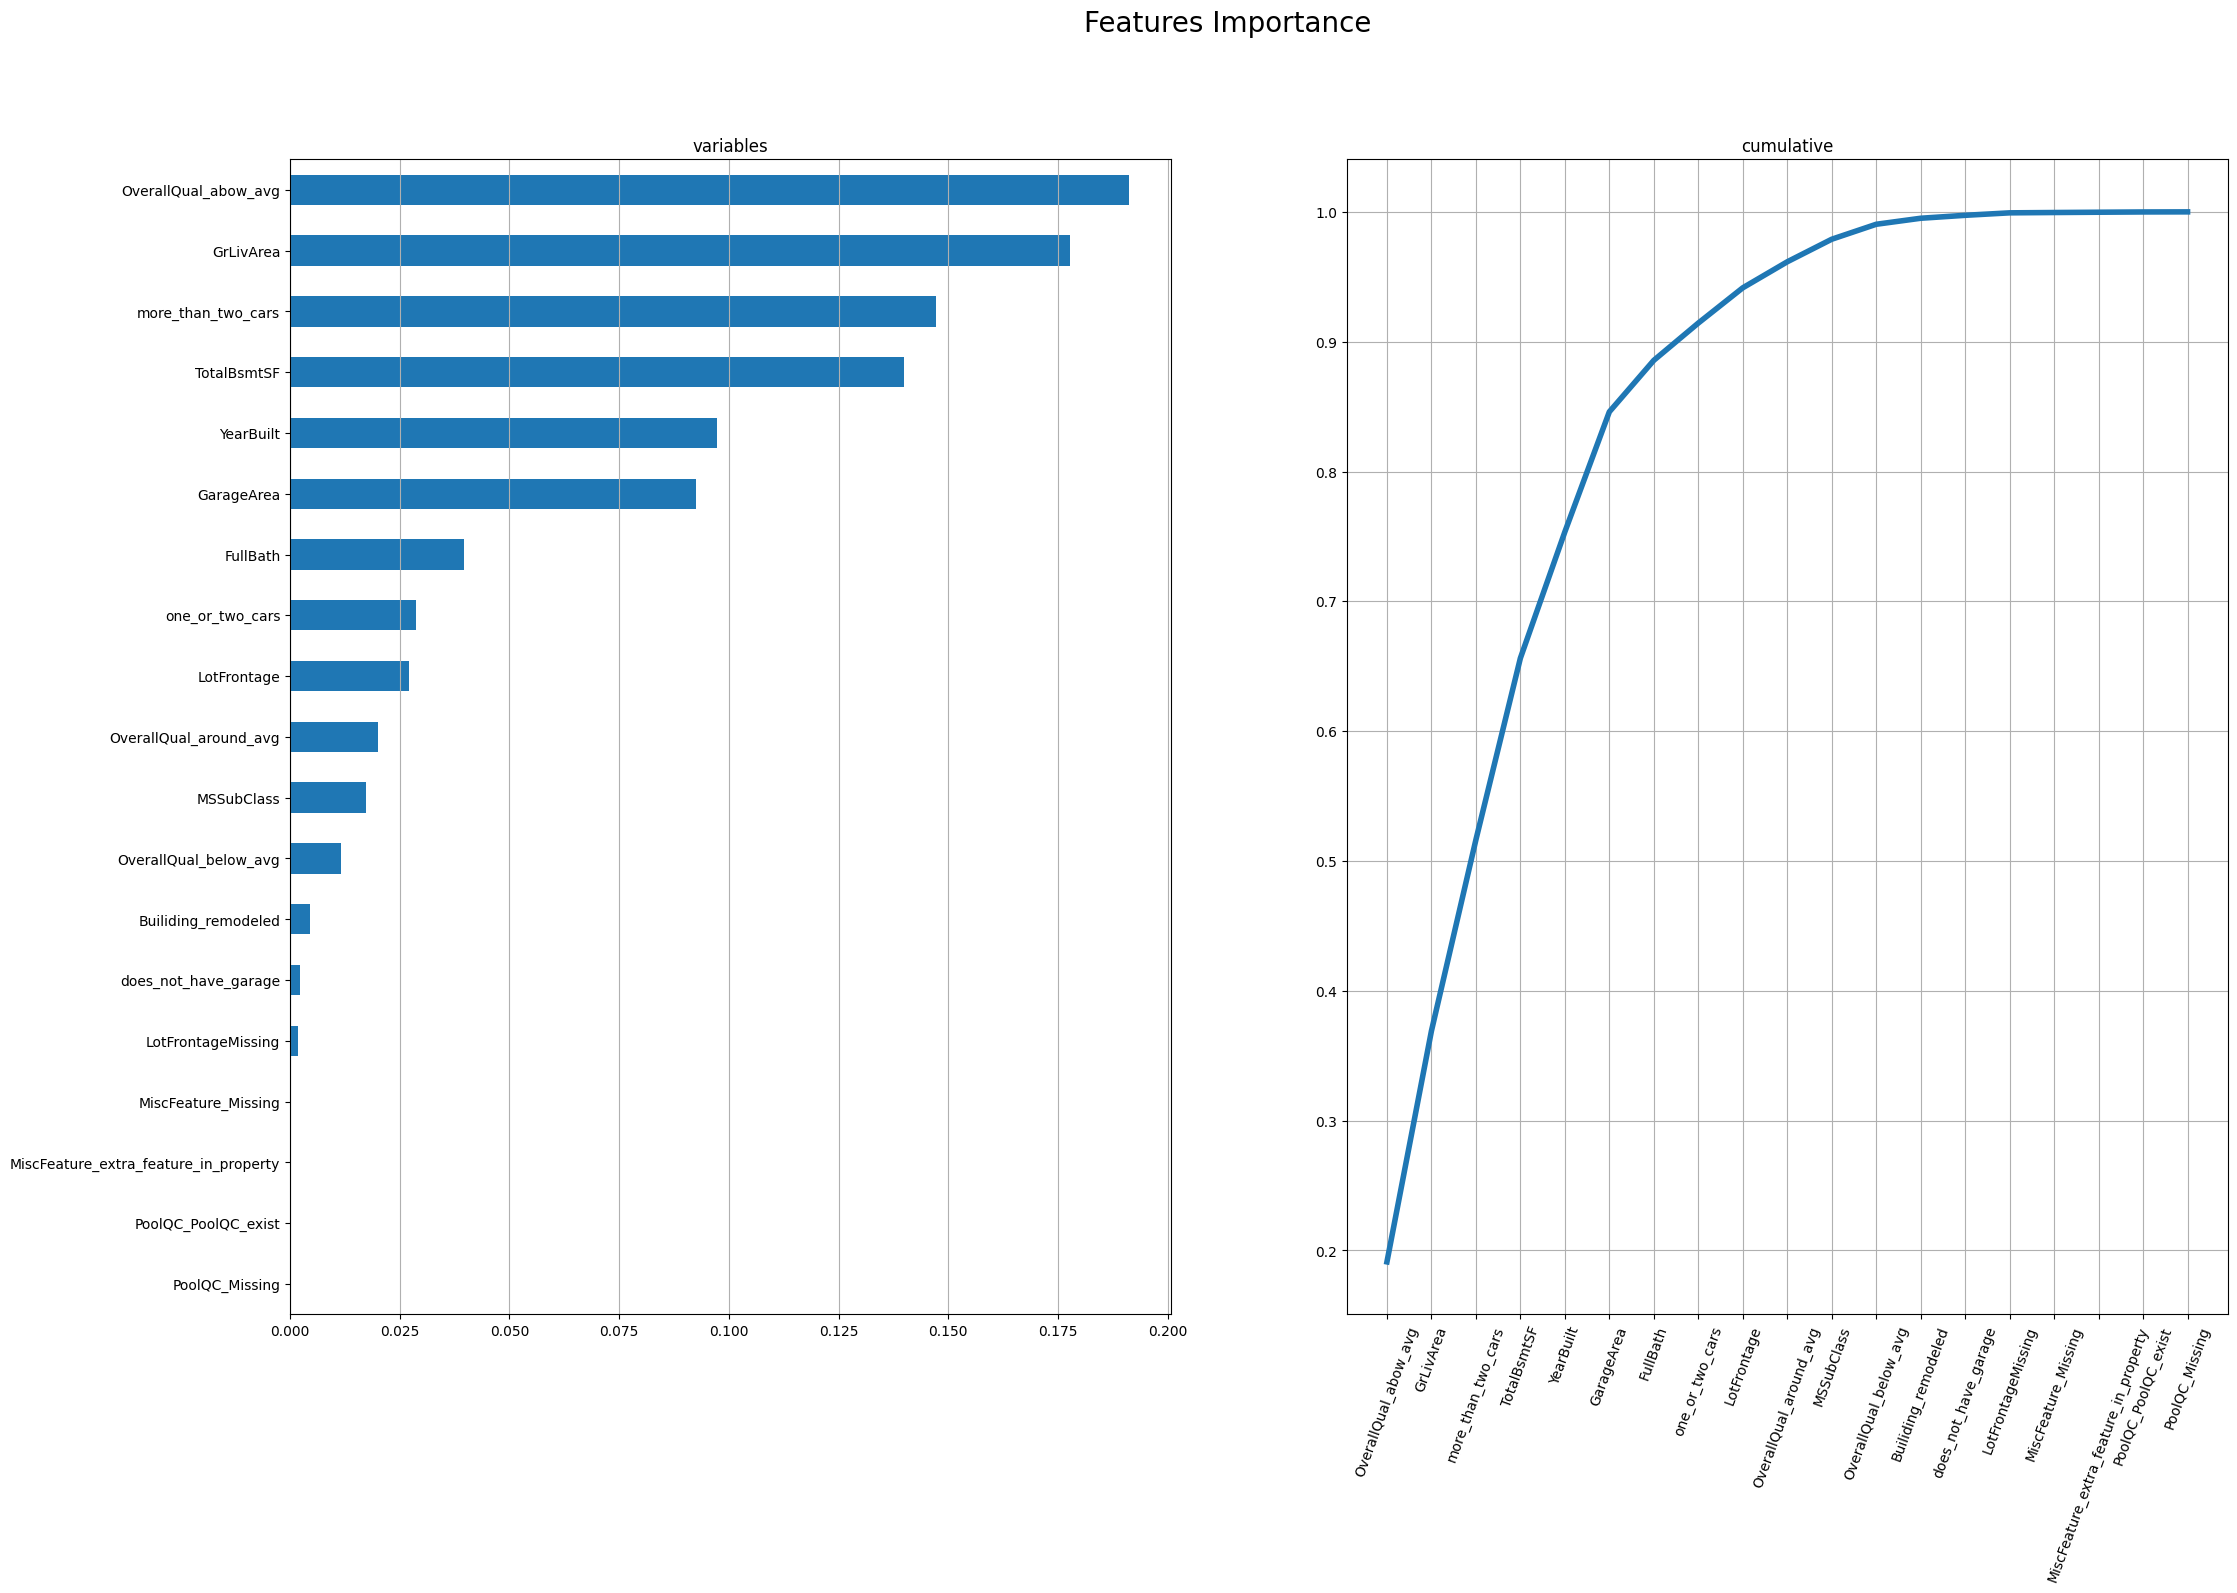

,VARIABLE,IMPORTANCE,cumsum
0,OverallQual_abow_avg,0.191177,0.191177
1,GrLivArea,0.177844,0.369021
2,more_than_two_cars,0.147300,0.516322
3,TotalBsmtSF,0.139903,0.656224
4,YearBuilt,0.097300,0.753524
5,GarageArea,0.092462,0.845986
6,FullBath,0.039664,0.885650
7,one_or_two_cars,0.028692,0.914342
8,LotFrontage,0.027160,0.941502
9,OverallQual_around_avg,0.020043,0.961544


In [209]:
from functions import features_importance
model = RandomForestRegressor(max_features=0.33, min_samples_leaf=3, n_estimators=200)
model.fit(X_train,y_train)
features_importance(X_train,y_train,X_names= X_train.columns.tolist(),model = model, task="regression", figsize=(25,15) )